# WITH PANDAS AND MATPLOTLIB

In [25]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [26]:
df = kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [27]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [28]:
# with matplotlib

df.loc[df["gender"]=="M"].count()

id                         2428
name                       2428
date                       2428
manner_of_death            2428
armed                      2419
age                        2354
gender                     2428
race                       2242
city                       2428
state                      2428
signs_of_mental_illness    2428
threat_level               2428
flee                       2366
body_camera                2428
dtype: int64

In [29]:
df.loc[df["gender"]=="F"].count()

id                         107
name                       107
date                       107
manner_of_death            107
armed                      107
age                        104
gender                     107
race                        98
city                       107
state                      107
signs_of_mental_illness    107
threat_level               107
flee                       104
body_camera                107
dtype: int64

<BarContainer object of 2 artists>

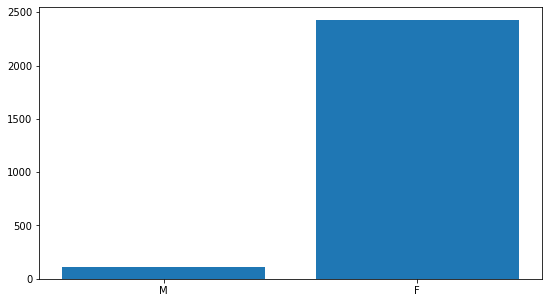

In [30]:
gender= ["M", "F"]
index_n = [107,2428]

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(gender, index_n)

## 2: Plot 7 most common kill weapons

In [31]:
df["armed"].value_counts()

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64

(array([64.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.0000e+00, 1.4070e+02, 2.8040e+02, 4.2010e+02, 5.5980e+02,
        6.9950e+02, 8.3920e+02, 9.7890e+02, 1.1186e+03, 1.2583e+03,
        1.3980e+03]),
 <BarContainer object of 10 artists>)

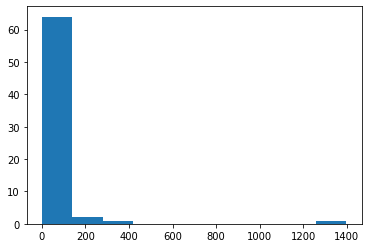

In [32]:
# with matplotlib

plt.hist(df["armed"].value_counts())

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [33]:

df.loc[df["age"]< 25].head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
22,43,Brian Barbosa,11/01/15,shot,gun,23.0,M,H,South Gate,CA,False,attack,Not fleeing,False
26,49,Marcus Golden,14/01/15,shot,vehicle,24.0,M,B,St. Paul,MN,False,attack,Not fleeing,False


In [34]:
above25 = print(df.loc[df["age"]>= 25].value_counts().sum())
above25

1832


In [35]:
under25 = print(df.loc[df["age"]< 25].value_counts().sum())
under25

422


In [43]:
df["age"].dropna(inplace=True)


In [38]:
df.fillna({
    "age" : df["age"].mean()
})

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00000,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00000,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00000,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00000,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00000,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00000,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,36.60537,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00000,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00000,M,B,Oshkosh,WI,False,attack,Car,True


In [53]:
df["age"].dropna(axis= 0, inplace=True)


In [56]:
df["age"].isnull().sum()

77

In [16]:
df.loc[df["age"]> 25].head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False


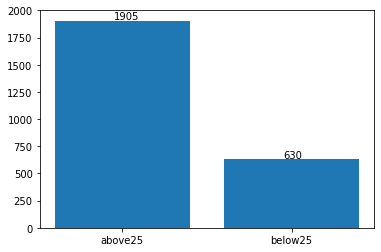

In [ ]:
# with matplotlib


## 4: Plot number of killed poeple by race

In [48]:
df["race"].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

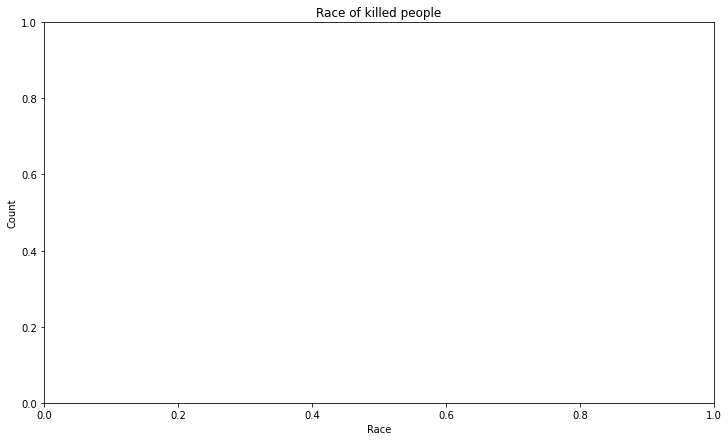

In [49]:
# with matplotlib
Race = ["W", "B", "H", "A", "N", "O"]
Count = [1201, 618, 423, 39, 31, 28]

plt.figure(figsize=[12,7])

plt.title('Race of killed people')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [60]:
df["age_cat"] = df["above25", "under25"]

KeyError: ('above25', 'under25')

## 5: Killed People According to Races (Pie Chart)

In [57]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [61]:
df["race"].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

array([1168,  592,  401,   36,   29,   28])

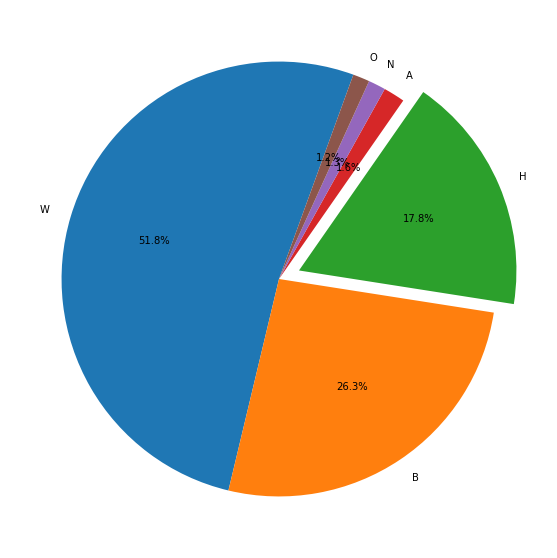

In [ ]:
# matplotlib

